<Axes: xlabel='group', ylabel='count'>

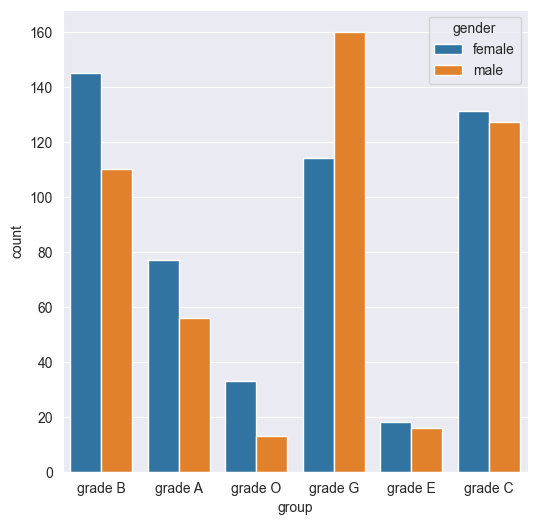

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("./StudentsPerformance.csv")

'''fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов', fontsize=15)

df.info()

ax[0].hist(df['math score'], bins=20)
ax[0].set_title('math')
ax[1].hist(df['reading score'])
ax[1].set_title('reading')
ax[2].hist(df['writing score'])
ax[2].set_title('writing')

print(df['math score'].mean())
print(df['reading score'].mean())
print(df['writing score'].mean())'''
'''

counts = df['parental level of education'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(counts.index, counts.values)
ax[0].set_xticklabels(counts.index, rotation=45, ha='right')
ax[1].hist(df.groupby('parental level of education')['math score'].mean())
'''
'''
print(df[(df['gender'].str.strip() == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)].shape)

df.head()

print(df.groupby('gender').agg(['min', 'max', 'median']))


print(df.groupby(['gender','lunch', 'test preparation course'])['math score'].agg('mean'))

df.head()

df.groupby('race/ethnicity')['parental level of education'].value_counts().plot(kind='bar')

parents = df.groupby('race/ethnicity')['parental level of education'].value_counts()
parents_df = parents.reset_index(name='count')  # колонки: ['race/ethnicity','parental level of education','count']
print(parents_df)

# seaborn barplot: X = education, Y = count, цвет (hue) = раса
plt.figure(figsize=(12,6))
sns.barplot(
    data=parents_df,
    x='parental level of education',
    y='count',
    hue='race/ethnicity',
    dodge=True   # рядом стоящие столбики по группам
)
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(12,6))
sns.barplot(
    data=parents_df,
    x='race/ethnicity',
    y='count',
    hue='parental level of education',
    dodge=True   # рядом стоящие столбики по группам
)
plt.xticks(rotation=45, ha='right')'''

df.head()
'''df.groupby('parental level of education')['test preparation course'].value_counts().plot(kind='bar')
parents = df.groupby('parental level of education')['test preparation course'].value_counts()
parents_df = parents.reset_index(name='count')
plt.figure(figsize=(10,5))

sns.barplot(
    data=parents_df,
    x='parental level of education',
    y='count',
    hue='test preparation course',
    dodge=True
)
plt.xticks(rotation=45, ha='right')'''

math_df = df.copy()
'''mask = df['math score'] > 40
math_df['math_result'] = np.zeros_like(math_df['math score'], dtype=int)
math_df['math_result'][mask] = 1
count = math_df['math_result'].value_counts().sort_index()
lable = ['fail', 'pass']
math_df.head(10)
plt.figure(figsize=(6,6))
plt.pie(count, labels=lable)'''

math_df['mean_score'] = (math_df['math score']+math_df['reading score']+math_df['writing score'])//3
math_df['group'] = np.zeros_like(math_df['math score'], dtype=str)
math_df.loc[(math_df['mean_score'] <= 40) | (math_df['math score'] < 40), 'group'] = 'grade E'
math_df.loc[(math_df['mean_score'] <= 60) &(math_df['mean_score'] > 40), 'group'] = 'grade G'
math_df.loc[(math_df['mean_score'] <= 70) &(math_df['mean_score'] > 60), 'group'] = 'grade C'
math_df.loc[(math_df['mean_score'] <= 80) &(math_df['mean_score'] > 70), 'group'] = 'grade B'
math_df.loc[(math_df['mean_score'] <= 90) &(math_df['mean_score'] > 80), 'group'] = 'grade A'
math_df.loc[math_df['mean_score'] > 90, 'group'] = 'grade O'
math_df.head()

'''count = math_df['group'].value_counts()
lable = [l for l in count.index]
print(count, lable)
plt.figure(figsize=(6,6))
plt.pie(count, labels=lable)'''

print(math_df.groupby('gender')['mean_score'])

plt.figure(figsize=(6,6))

sns.countplot(data=math_df, x='group', hue='gender')






